# Workshop #1: Linear Algebra

In [1]:
#importing libraries
import numpy
import numpy as np
from PIL import Image
import numpy.linalg as nla
import scipy.linalg as sla
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import time
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

## Problem 1: Matrix multiplication with the rotation matrix

1. Given an arbitrary angle $\theta$, we can define a rotation matrix 𝑅 by


$$
R_{\theta} =
\begin{pmatrix}
cos \theta & -sin \theta \\
sin \theta & cos \theta \\
\end{pmatrix}
$$

This matrix has the effect that any vector in standard position is rotated counterclockwise by an angle $\theta$. If $v$ is in standard position, then the rotated vector $v_r$ is obtained as $v_r = R_{\theta}v$. We will use this matrix to illustrate why matrix multiplication is defined in a very unusual way. We will use two angles, $\alpha$ = 30° and $\beta$ = 45°,
and the vector $v = [1,0]^T$ for demonstration.

To achieve this, we will do the following:
- Calculate the matrices $R_{30°}$ and $R_{45°}$. Since some of the results will be decimal numbers, round them to 4 decimal places. Note: for example, for sin 30° in Python you must write np.sin(np.radians(30))
- Choose one angle (matrix) and rotate the vector $v$ by that angle. Call the output $v_1$.
- Now use the other angle (matrix) to rotate the output $v_1$ of the previous rotation $v_2$.
- In terms of angle of rotation, how does the final output $v_2$ compare to the original input $v$?
- Now calculate the matrix $R_{mult} = R_{30°} ⋅ R_{45°}$. Then use this matrix to rotate the vector $v$. Call the
output $v_{mult}$. How does $v_{mult}$ compare to $v_2$? Seeing this relation, what is the meaning of the matrix
$R_{mult} = R_{30°} ⋅ R_{45°}$ in terms of rotating vectors by some angle?
- To wrap up, calculate $R_{75°}$ using $\theta = 75°$ in the expression for $R_{\theta}$. How does $R_{75°}$ compare to $R_{mult}$?

In [ ]:
import numpy as np

#rotation matrix for theta
def rotation_matrix(theta):
    theta_rad = np.radians(theta)
    return np.array([[np.cos(theta_rad), -np.sin(theta_rad)],[np.sin(theta_rad), np.cos(theta_rad)]])

v = np.array([1, 0])

#matrices for 30 and 45
R30 = rotation_matrix(30)
R45 = rotation_matrix(45)

#rotate v by 30 to get v1
v1 = R30 @ v
print(f"v1: {v1}")
print()

#rotate v1 by 45 to get v2
v2 = R45 @ v1
print(f"v2: {v2}")
print()

#calculate R_mult R30 * R45
Rmult = R30 @ R45
print(f"Rmult (R30 * R45): {Rmult}")
print()

#use R_mult to rotate v
vmult = Rmult @ v
print(f"vmult (after rotating by Rmult): {vmult}")
print()

#how does  vmult  compare to  v2? vmult and v2 are the same
print(f"vmult: {vmult}")
print(f"v2: {v2}")
print()

#calculate R75
R75 = rotation_matrix(75)
print(f"R75: {R75}")
print()

#how does  R75  compare to  Rmult? R75 and Rmult are the same
print(f"R75: {R75}")
print()
print(f"Rmult: {Rmult}")

v1: [0.8660254 0.5      ]

v2: [0.25881905 0.96592583]

Rmult (R30 * R45): [[ 0.25881905 -0.96592583]
 [ 0.96592583  0.25881905]]

vmult (after rotating by Rmult): [0.25881905 0.96592583]

vmult: [0.25881905 0.96592583]
v2: [0.25881905 0.96592583]

R75: [[ 0.25881905 -0.96592583]
 [ 0.96592583  0.25881905]]

R75: [[ 0.25881905 -0.96592583]
 [ 0.96592583  0.25881905]]

Rmult: [[ 0.25881905 -0.96592583]
 [ 0.96592583  0.25881905]]


COMMENT: Vector v2 is the result of rotating v1 which has already been rotated by 30 by an additional 45.
Vector Vmult is the result of rotating v by 75 using Rmult = R30 * R45.
Therefore Vmult and v2 are the same because both represent the vector v rotated by 75 degrees.
Rmult represents a rotation of 75 by adding 30 and 45, so it represents rotating by 75 degrees directly.

## Problem 2: System of linear equations

A system of linear equations of the form

\begin{align}
\begin{cases}
a_{11}x_1+a_{12}x_2 = b_1 \\
a_{21}x_1+a_{22}x_2 = b_2 \\
\end{cases}
\end{align}

where $x_1$, $x_2$ are the variables and $a_{11}, a_{12}, a_{21}, a_{22}$ are some numbers/coefficients, can be represented in a matrix form

\begin{align}
Ax = b
\end{align}
where
$$
A =
\begin{pmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}\\
\end{pmatrix}
$$
\
$$
x =
\begin{pmatrix}
x_{1}\\
x_{2}\\
\end{pmatrix}
$$
\
$$
b =
\begin{pmatrix}
b_{1}\\
b_{2}\\
\end{pmatrix}
$$

We can solve this system using inverse matrices:

$$
{A^{-1} Ax = A^{-1} b}\\
{I_n x = A^{-1} b} \\
{x  =A^{-1} b}
$$

Basically, to solve a system of linear equations, one must find the inverse of matrix $A$, and multiply it by the vector-column of the “results”. Use this approach to solve the following systems:

a)

\begin{align}
\begin{cases}
2x+3y = 4 \\
5x+4y = 7 \\
\end{cases}
\end{align}

b)

\begin{align}
\begin{cases}
x+3y-2z = 5 \\
3x+5y+6z = 7 \\
2x+4y+3z = 8 \\
\end{cases}
\end{align}


a)

In [ ]:
A = np.array([[2,3], [5,4]])
B = np.array([4,7])

A_inv = nla.inv(A)

#multiply the inverse of A with B to get values for x
x = np.dot(A_inv,B)
print(x)

[0.71428571 0.85714286]


b)

In [ ]:
A = np.array([[1,3,-2], [3,5,6],[2,4,3]])
B = np.array([5,7,8])

A_inv = nla.inv(A)

#multiply the inverse of A with B to get values for x
x = np.dot(A_inv,B)
print(x)

[-15.   8.   2.]


## Problem 3: Weather Data
The file *Weather.csv* contains weather data in great detail. There are four feature-vectors in the table **T** (temperature in ℃), **P** (air pressure in hPa), **H** (humidity in %) and **W** (wind speed in km/h). The data is indexed by time, as given by the column Local Time.
* There are some missing data in the vectors. Before we start any calculations, we need to take care of this (and there are many ways in which you can handle this). Remove the rows that contain missing data in any of the columns.
* The vectors contain values which are of different magnitudes and variability. We “fix” this in a two step process. Normalize the vectors using the Euclidean norm, then center the normalized vectors.
* In the last step, we calculate the similarity matrix of the *normalized and centered feature-vectors*. Are there any vectors that are not similar, based on their similarity measure?

**Note: Centering the vectors means subtracting the average of the vector from every element of the vector**

In [2]:
# Load the raw data and print the head
df_weather = pd.read_csv('Weather.csv')
df_weather.head()

,Local time,T,P,H,W
0,28.02.2018 22:00,-6.1,739.3,69.0,2.0
1,28.02.2018 19:00,-5.0,737.7,70.0,2.0
2,28.02.2018 16:00,-4.4,734.8,100.0,4.0
3,28.02.2018 13:00,-1.1,733.6,71.0,2.0
4,28.02.2018 10:00,-3.8,732.6,72.0,1.0


In [3]:
# Print the info about the data
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Local time  7307 non-null   object 
 1   T           7299 non-null   float64
 2   P           7295 non-null   float64
 3   H           7264 non-null   float64
 4   W           7291 non-null   float64
dtypes: float64(4), object(1)
memory usage: 285.6+ KB


In [4]:
# Count the number of missing data
df_weather.isna().sum()

,0
Local time,0
T,8
P,12
H,43
W,16


In [5]:
# Drop the missing values
df_weather.dropna(inplace=True) #drop the rows with missing values
print(df_weather.isna().sum())

df_clean = df_weather.drop(columns=['Local time']) #drop time values column
print(df_clean.info())

Local time    0
T             0
P             0
H             0
W             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 7236 entries, 0 to 7306
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       7236 non-null   float64
 1   P       7236 non-null   float64
 2   H       7236 non-null   float64
 3   W       7236 non-null   float64
dtypes: float64(4)
memory usage: 282.7 KB
None


In [6]:
# The data is clean, so we proceed with normalization and centralization
feature_vec = df_clean[['T', 'P', 'H', 'W']].values

feature_vec_dolz = nla.norm(feature_vec, axis=1, keepdims=True)

#normalize using Euclidean norm
normalized_feature_vec = feature_vec / feature_vec_dolz

#centralize the vectors
centralized_feature_vec = normalized_feature_vec - np.mean(normalized_feature_vec, axis=0)

print('Normalized vectors = \n', normalized_feature_vec)
print()
print('Centralized vectors = \n', centralized_feature_vec)

Normalized vectors = 
 [[-0.00821504  0.99563565  0.0929242   0.00269346]
 [-0.00674734  0.99550188  0.0944627   0.00269893]
 [-0.00593314  0.99083438  0.13484409  0.00539376]
 ...
 [ 0.03629673  0.99679549  0.07095601  0.00682269]
 [ 0.04157355  0.99762844  0.05470204  0.00410265]
 [ 0.04695624  0.99799127  0.04243859  0.00273797]]

Centralized vectors = 
 [[-0.02589126  0.00035078  0.00249681 -0.00076911]
 [-0.02442356  0.00021701  0.00403531 -0.00076363]
 [-0.02360936 -0.00445049  0.0444167   0.0019312 ]
 ...
 [ 0.0186205   0.00151062 -0.01947138  0.00336013]
 [ 0.02389733  0.00234357 -0.03572535  0.00064009]
 [ 0.02928002  0.0027064  -0.0479888  -0.00072459]]


Similarity matrix = 
 [[ 1.          0.57022567 -0.66422299  0.0828203 ]
 [ 0.57022567  1.         -0.97624083  0.17686037]
 [-0.66422299 -0.97624083  1.         -0.16474056]
 [ 0.0828203   0.17686037 -0.16474056  1.        ]]


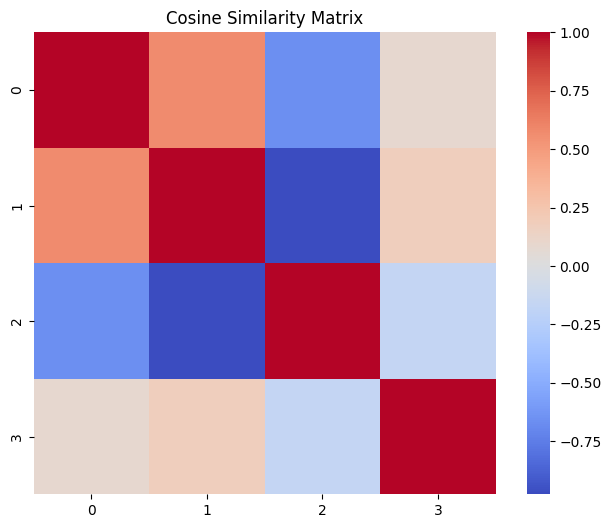

In [7]:
#cosine similarity
centralized_feature_vec_T = centralized_feature_vec.T

similarity_matrix_centralized = cosine_similarity(centralized_feature_vec_T)

print('Similarity matrix = \n', similarity_matrix_centralized)

# Visually display the similarity matrix (see how to plot this in Lecture 1)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix_centralized, annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Cosine Similarity Matrix')
plt.show()

## Problem 4: Random Matrix
The file *Random_Matrix.csv* contains a 4 × 4 symmetric matrix of random data. We use that matrix in the following calculations.
* Calculate SVD of the matrix
* Next, we will analyze the structure of the original data. Construct a rank 3 approximation of the original matrix (i.e. approximate the matrix using the three largest singular values)
* Let us measure how close the approximation matrix is to the original one. For this purpose, we use a **matrix norm** called **Frobenius norm** (see note below).  Calculate the difference of the two matrices (original minus approximate), and then calculate the Frobenius norm of the difference. Smaller numbers indicate that the matrices are “closer”. Is this approximation a good one?
* Repeat the process, now with a rank 2 approximation (construct it, and measure how close to the original matrix this approximation is). Is the rank 2 approximation managing to “capture” the original data? In other words – would you use it in practical applications?

**Note**: to obtain the *Frobenius norm* of a matrix $A = [a_{ij}]_{m \times n}$, denoted as $\|A\|_F$, we calculate:
\begin{equation} \|A\|_F = \sqrt{ \sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}^2 } \end{equation}
Essentially, the Frobenius norm of a matrix is a "glorified" Euclidean norm. To calculate it you could “flatten” the matrix, i.e. re-write it as a vector of its columns, and then calculate the Euclidean norm of that vector.

The Python code for this is: **nla.norm(original matrix - approximative matrix, 'fro')**

In [ ]:
# Reading the raw data and convert it to numpy array
matrix = np.array(pd.read_csv('Random_Matrix.csv'))

print(matrix)

[[-30.8837  21.7457 -11.7665  11.4336]
 [ -3.4356 -11.7665  23.6877 -36.5359]
 [  6.1754  11.4336 -36.5359  78.6051]]


In [ ]:
# Calculating the SVD
U,S,V = nla.svd(matrix)

# Printing the U, S, V components
print('U = \n', U)

print('S = \n', S)

print('V = \n', V)

U = 
 [[ 0.19176593 -0.97738808  0.08909751]
 [-0.44844453 -0.00650938  0.89378696]
 [ 0.87299675  0.21135318  0.43955262]]
S = 
 [99.93447904 37.28791319  6.8772852 ]
V = 
 [[ 0.0101      0.19440941 -0.44804112  0.87256068]
 [ 0.84512411 -0.50313536  0.0971968   0.15222627]
 [-0.4519141  -0.51671372  0.59092225  0.42378234]
 [-0.28537148 -0.66488099 -0.66379427 -0.18940316]]


In [ ]:
# Creating a rank 3 approximation
k = 3
Uk = U[:, :k]
Sk = np.diag(S[:k])
Vk = V[:k, :]

matrix_k = Uk @ Sk @ Vk
print('Original matrix = \n', matrix)
print('Rank-3 approximation = \n', matrix_k)
print()

#Frobenius norm
frobenius_norm = nla.norm(matrix - matrix_k, 'fro')
print(f'Frobenius norm: {frobenius_norm}')

Original matrix = 
 [[-30.8837  21.7457 -11.7665  11.4336]
 [ -3.4356 -11.7665  23.6877 -36.5359]
 [  6.1754  11.4336 -36.5359  78.6051]]
Rank-3 approximation = 
 [[-30.8837  21.7457 -11.7665  11.4336]
 [ -3.4356 -11.7665  23.6877 -36.5359]
 [  6.1754  11.4336 -36.5359  78.6051]]

Frobenius norm: 2.781856480880731e-14


In [ ]:
# Creating a rank 2 approximation
k = 2
Uk = U[:, :k]
Sk = np.diag(S[:k])
Vk = V[:k, :]

matrix_k = Uk @ Sk @ Vk
print('Original matrix = \n', matrix)
print('Rank-2 approximation = \n', matrix_k)
print()

#Frobenius norm
frobenius_norm = nla.norm(matrix - matrix_k, 'fro')
print(f'Frobenius norm: {frobenius_norm}')

Original matrix = 
 [[-30.8837  21.7457 -11.7665  11.4336]
 [ -3.4356 -11.7665  23.6877 -36.5359]
 [  6.1754  11.4336 -36.5359  78.6051]]
Rank-2 approximation = 
 [[-30.60679008  22.06231582 -12.12858703  11.17392779]
 [ -0.65776185  -8.59034975  20.05540264 -39.14081709]
 [  7.54150411  12.99558874 -38.32221586  77.32403618]]

Frobenius norm: 6.8772852032488725


COMMENT: Rank-3 approximation is very close to zero, which means it is an exact or near-exact match to the original.
The rank-2 approximation is a bigger number, indicating that it does not perfectly match the original matrix and has some loss of detail.
For practical applications where some error is acceptable, the rank-2 approximation would work, but i would not use it for cases where exact replication of the original is need.



# BONUS PROBLEM:
## Image Approximation
Use low-rank approximation of a matrix to construct approximations of the image *cake.jpg*. Follow the process from class. You should produce **10 images** in the rank range from k=10 to k=100 (increment by 10, best to use a for-loop or similar). What is the (lowest) rank of the approximation you would use if you had to choose from the ten images you produced? Note: the last question is subjective 😊

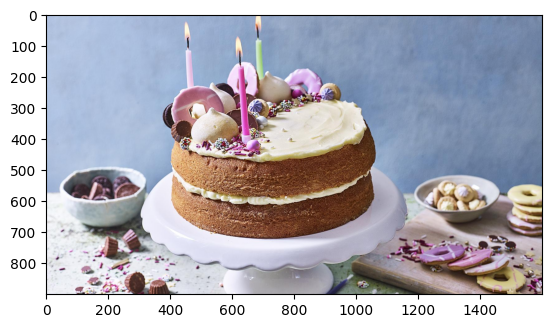

In [ ]:
# Loading the image and show original image
img_original = matplotlib.image.imread('cake.jpg')

plt.figure()
plt.imshow(img_original)

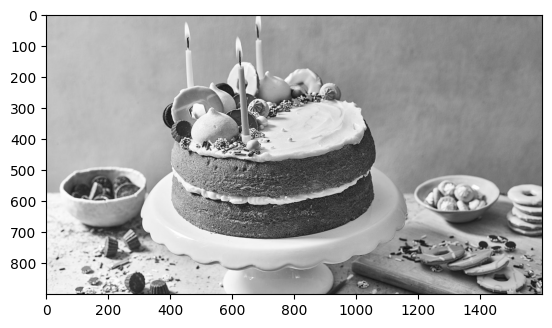

In [ ]:
# Convert the image to grayscale
img = img_original[...,:3].dot([0.2989, 0.5870, 0.1140]) #conversion 'trick'

plt.figure()
plt.imshow(img, cmap='gray')

In [ ]:
# getting the SVD of the image matrix
U, S, V = nla.svd(img)

#do not print the matrtices, they are too big! Print their shape
print('U = \n', U.shape)

print('S = \n', S.shape)

print('V = \n', V.shape)

U = 
 (900, 900)
S = 
 (900,)
V = 
 (1600, 1600)


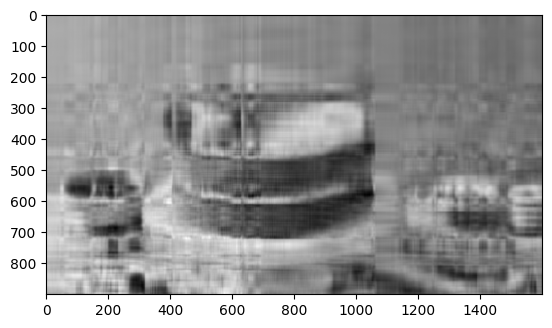

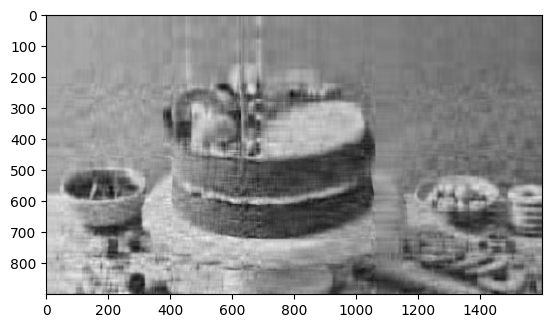

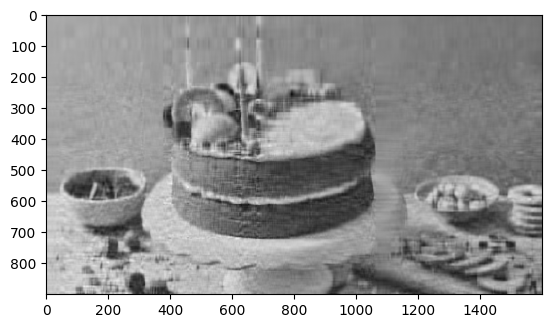

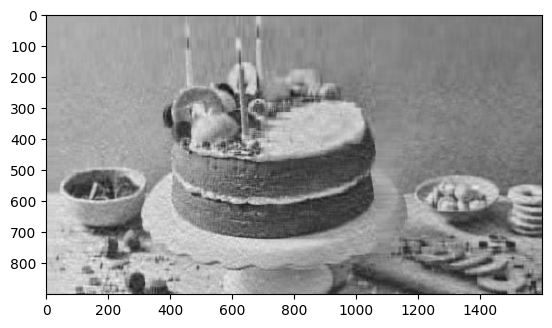

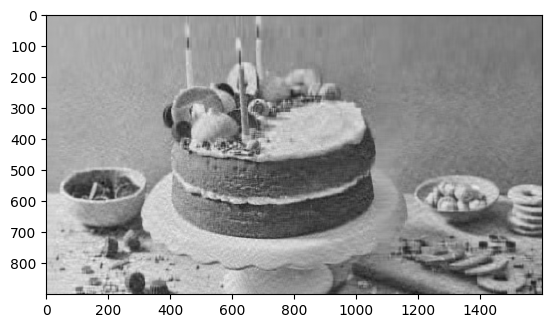

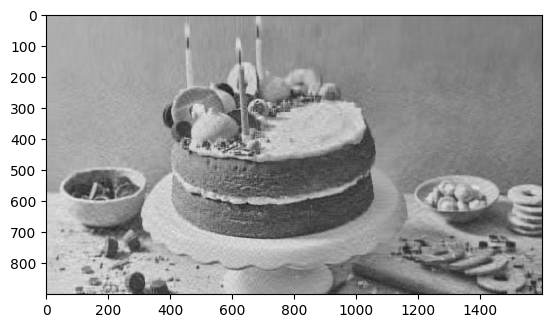

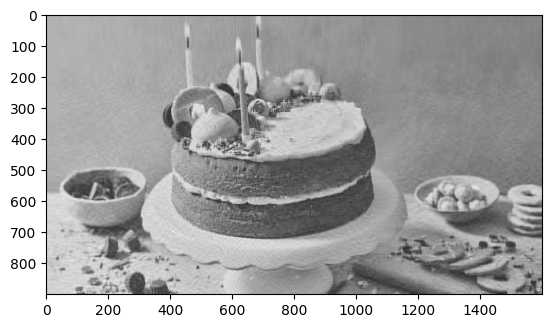

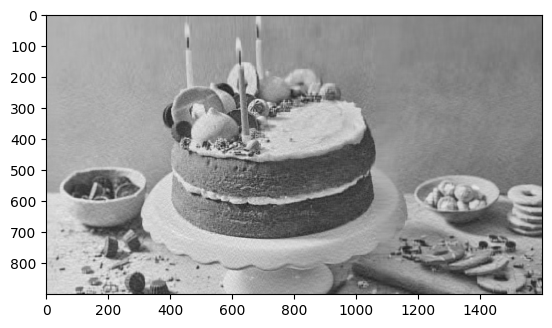

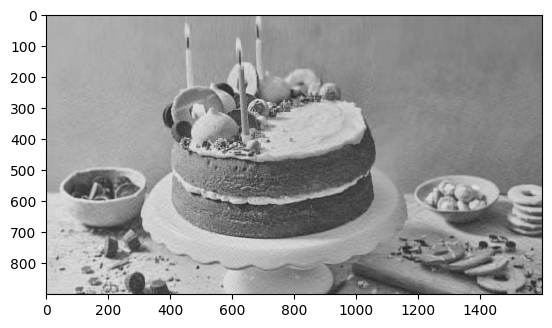

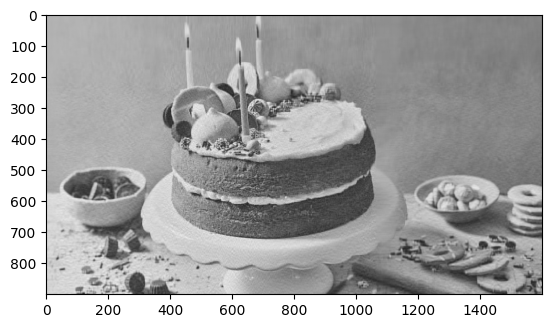

In [ ]:
#creating low-rank approximations of orde k=10, 20, ..., 100

for k in range(10, 101, 10):
    # add code here
    Uk = U[:, :k]
    Sk = np.zeros((k ,k))
    np.fill_diagonal(Sk, S[:k])
    Vk = V[:k, :]

    # Reconstruct the image with the low-rank approximation
    img_approx = Uk @ Sk @ Vk

    #Show the image
    plt.imshow(img_approx, cmap='gray')
    plt.show()

In [ ]:
# Memory compression if we use k=60 approximation
print(f'The original image takes {img.size} memory places')

# Memory usage for rank-60 approximation
m, n = img.shape
memory_U = m * 60
memory_S = 60
memory_V = 60 * n

new_mem = memory_U + memory_S + memory_V # add code here
print()
print(f'The rank 60 approximaton takes {new_mem} memory places')

The original image takes 1440000 memory places

The rank 60 approximaton takes 150060 memory places


COMMENT: The lowest rank I would choose to use is k=40 or k=50 since it gives good similarity and quality with acceptable memory compression.